In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from qsogen_4_catalog.qsosed import Quasar_sed

In [9]:
sed = Quasar_sed(30, wavlen = np.logspace(np.log10(500), 5, 1000), add_NL = False)
sed2 = Quasar_sed(30, wavlen = np.logspace(np.log10(1100), 5, 1000), add_NL = False)
sed.get_full_SED()
sed2.get_full_SED()

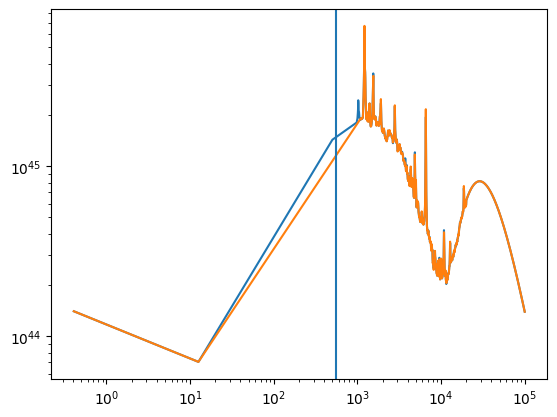

In [10]:
fig, ax = plt.subplots()
ax.plot(sed.fullsed_wavlen, sed.fullsed_luminosity_density*sed.fullsed_wavlen)
ax.plot(sed2.fullsed_wavlen, sed2.fullsed_luminosity_density*sed2.fullsed_wavlen)
ax.axvline(550)
ax.set_xscale('log')
ax.set_yscale('log')


In [6]:
L1 = np.interp(550, sed.wavlen, sed.lum)
L2 = np.interp(800, sed.wavlen, sed.lum)




In [7]:
(np.log(L1)-np.log(L2))/(np.log(550)-np.log(800))

0.3489982314348341

In [14]:
sed_blu = Quasar_sed(30, AGN_type=2, ebv = 4)
sed_rossa = Quasar_sed(30, AGN_type=2, ebv = 4, add_NL=True, Av_lines = 15, nlr_template_idx=21)

(1000, 20000.0)

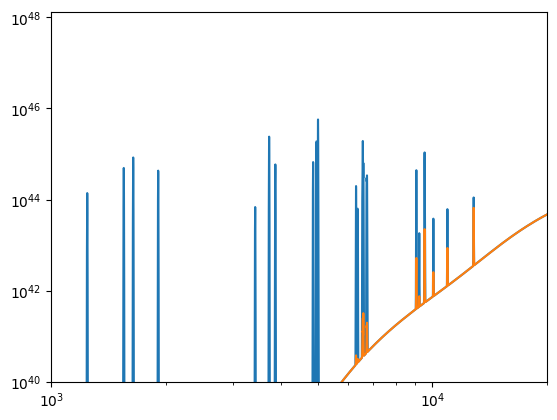

In [15]:
fig, ax = plt.subplots()
ax.plot(sed_blu.wavlen, sed_blu.lum)
ax.plot(sed_rossa.wavlen, sed_rossa.lum)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e40, None)
ax.set_xlim(1000, 2e4)

In [18]:
sed_blu.Av_lines

1e-05

In [15]:
sed_feltre = Quasar_sed(32, AGN_type=1, ebv = 0,  NL_normalization="feltre")
sed_lamastra = Quasar_sed(32, AGN_type=1, ebv = 0,  NL_normalization="lamastra")

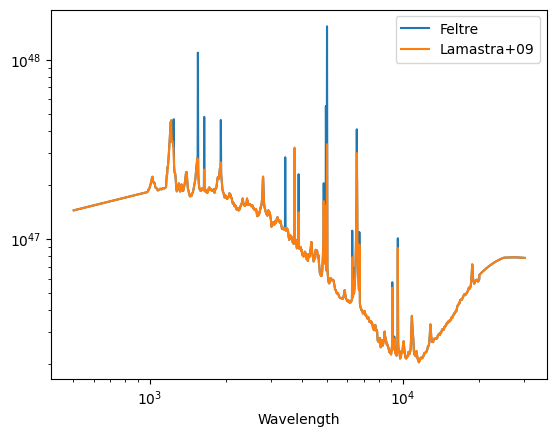

In [16]:
fig, ax = plt.subplots()
ax.loglog(sed_feltre.wavlen, sed_feltre.lum, label = "Feltre")
ax.loglog(sed_lamastra.wavlen, sed_lamastra.lum, label = "Lamastra+09")
ax.set_xlabel("Wavelength")
ax.legend()

/tmp/ipykernel_21726/4165516110.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])
/tmp/ipykernel_21726/4165516110.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])


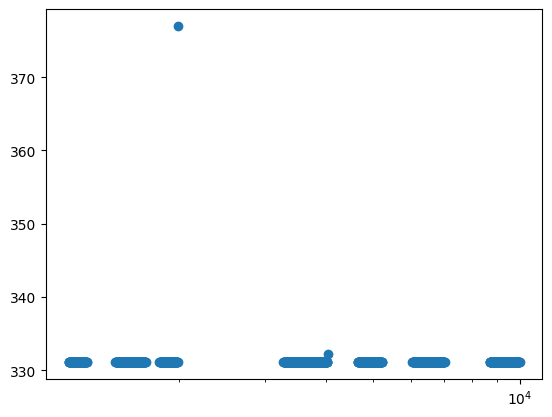

In [21]:
fig, ax = plt.subplots()
ax.scatter(template_2[:,0], template_2[:,1]/template_1[:,1])
#ax.plot(template_1[:,0], template_1[:,1])

ax.set_xscale('log')

In [34]:
def get_integrated_xray_luminosity(log_L_1, wavlen_1 = 6.2, wavlen_2 = 1.24, gamma = 1.8):
    ###it computes the integrated luminosity between wavlen_1 and wavlen_2
    ###log_L_1 is in erg/s hz^-1
    ### L_lambda ~ lambda^gamma-3
    log_L_1_lambda = log_L_1 - np.log10(wavlen_1*wavlen_1/2.998e18)
    log_norm = log_L_1_lambda - (gamma-3)*np.log10(wavlen_1)
    if wavlen_1 >= wavlen_2:
        temp = np.log10((wavlen_1**(gamma-2)- wavlen_2**(gamma-2))/(gamma-2))
        
    else:
        temp = np.log10((wavlen_2**(gamma-2) - wavlen_1**(gamma-2))/(gamma-2))
    return log_norm +temp

def get_L2kev(L2500):
    ##Lusso+16
    return 0.642*L2500 +6.965


In [39]:
lx = get_L2kev(35)

In [40]:
get_integrated_xray_luminosity(lx)

47.397884465445856

In [11]:
10**0.3

1.9952623149688795